In [71]:
# setting up the environment by importing the necessary libraries
from io import IncrementalNewlineDecoder
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [72]:
# uploading the data set to google colab
from google.colab import files
uploaded = files.upload()

Saving store_sales.csv to store_sales (1).csv


In [73]:
# loading the data set
sales_data = pd.read_csv("store_sales.csv")

In [74]:
sales_data.head()

,date,store,sales,promo,holiday
0,1/1/2022,1,184.78,0,0
1,1/2/2022,1,192.62,0,0
2,1/3/2022,1,212.68,0,0
3,1/4/2022,1,249.58,1,0
4,1/5/2022,1,223.50,0,0


Above we have the first 5 rows of the data.

In [75]:
sales_data.tail()

,date,store,sales,promo,holiday
7295,12/27/2023,10,242.08,0,0
7296,12/28/2023,10,235.35,0,0
7297,12/29/2023,10,222.82,0,0
7298,12/30/2023,10,236.04,1,0
7299,12/31/2023,10,208.29,0,0


Above we have the last 5 rows of the data.

In [76]:
sales_data.shape

(7300, 5)

The dataset has 7300 rows and 5 columns.

In [77]:
sales_data.columns

Index(['date', 'store', 'sales', 'promo', 'holiday'], dtype='object')

Above we have the column names

In [78]:
sales_data.describe()

,store,sales,promo,holiday
count,7300.000000,7300.000000,7300.000000,7300.000000
mean,5.500000,228.434571,0.202192,0.104110
std,2.872478,26.625636,0.401662,0.305424
min,1.000000,160.710000,0.000000,0.000000
25%,3.000000,209.217500,0.000000,0.000000
50%,5.500000,226.795000,0.000000,0.000000
75%,8.000000,245.590000,0.000000,0.000000
max,10.000000,340.730000,1.000000,1.000000


In [79]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7300 non-null   object 
 1   store    7300 non-null   int64  
 2   sales    7300 non-null   float64
 3   promo    7300 non-null   int64  
 4   holiday  7300 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 285.3+ KB


In [80]:
#changing the datatype of the date column from object to datetime
sales_data['date']=pd.to_datetime(sales_data['date'], format= 'mixed')

In [81]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7300 non-null   datetime64[ns]
 1   store    7300 non-null   int64         
 2   sales    7300 non-null   float64       
 3   promo    7300 non-null   int64         
 4   holiday  7300 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 285.3 KB


Now we can see that the datatype of date has changed to datetime.

let's check if there are any missing values or duplicates in the data.

In [82]:
sales_data.isnull().sum()

,0
date,0
store,0
sales,0
promo,0
holiday,0


There are no missing values.

In [83]:
sales_data.duplicated().sum()

np.int64(0)

There are no duplicates in the data.

In [84]:
# total sales per store
sales_data.groupby('store')['sales'].sum()

,sales
store,
1,169912.36
2,159293.35
3,159553.75
4,173784.73
5,161479.82
6,172590.88
7,169942.26
8,163896.68
9,178600.69


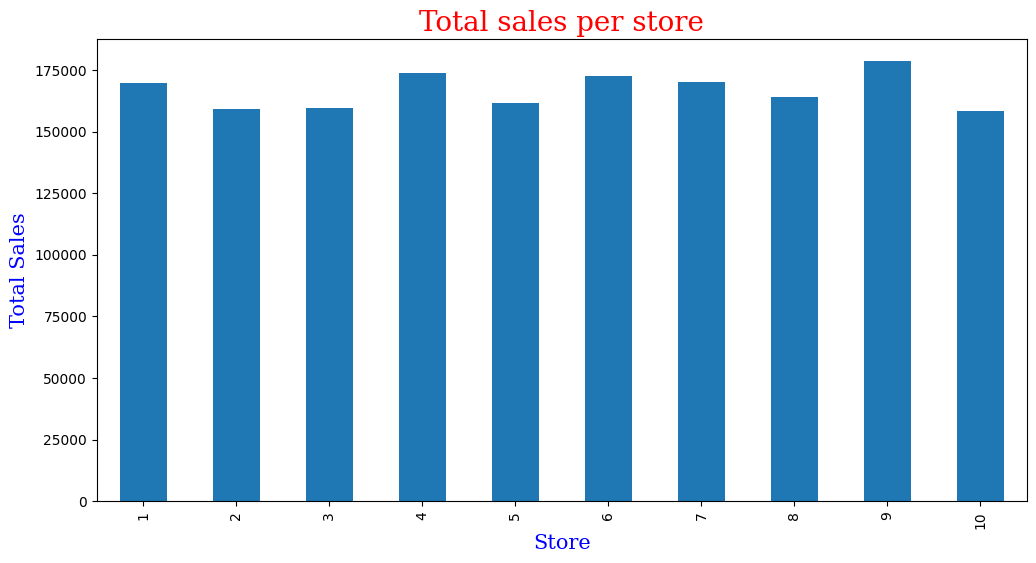

In [99]:
# plotting a bar chart to visualize Total sales per store
plt.figure(figsize=(12,6))
sales_data.groupby('store')['sales'].sum().plot(kind= 'bar')
font1 = {'family': 'serif', 'color': 'r', 'size': 20}
font2 = {'family': 'serif', 'color': 'b', 'size': 15}
plt.title("Total sales per store", fontdict= font1)
plt.xlabel('Store', fontdict= font2)
plt.ylabel('Total Sales', fontdict= font2)
plt.show()

In the above bar chart, the x axis represents the stores and the y axis represents the total sales.

**Store 9 has the highest sales.**

In [86]:
# Average sales per store
sales_data.groupby('store')['sales'].mean()

,sales
store,
1,232.756658
2,218.210068
3,218.566781
4,238.061274
5,221.205233
6,236.425863
7,232.797616
8,224.516000
9,244.658479


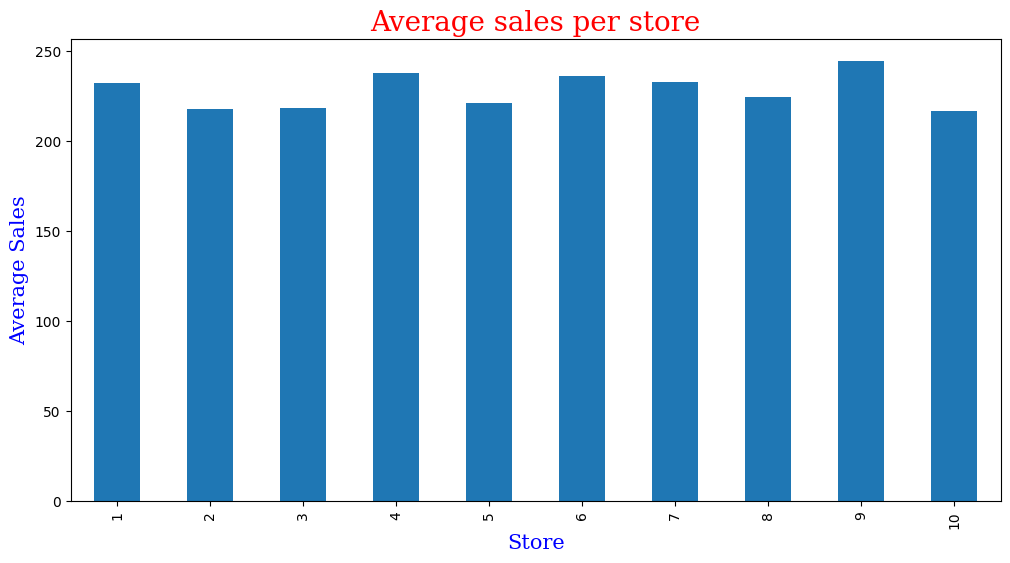

In [88]:
# plotting a bar chart to visualize Average sales per store
plt.figure(figsize=(12,6))
sales_data.groupby('store')['sales'].mean().plot(kind = 'bar')
font1 = {'family':'serif','color':'r', 'size': 20}
font2 = {'family':'serif','color':'b', 'size': 15}
plt.title("Average sales per store", fontdict = font1)
plt.xlabel("Store", fontdict = font2)
plt.ylabel("Average Sales", fontdict = font2)
plt.show()

The bar chart above visualizes the Average sales per store.

The x-axis represents the store number.

The y-axis represents the Average sales.

**Store 9 is leading in sales followed closely by store 4.**

In [89]:
sales_data['promo'] = sales_data['promo'].map({0: 'No Promo', 1: 'Promo'})

In [90]:
# impact of promotions on sales
sales_data.groupby(['store','promo'])['sales'].mean()

store  promo   
1      No Promo    227.221993
       Promo       253.629216
2      No Promo    211.830035
       Promo       242.470987
3      No Promo    212.482138
       Promo       242.094067
4      No Promo    232.659598
       Promo       262.307895
5      No Promo    215.044527
       Promo       245.227852
6      No Promo    230.172032
       Promo       258.884591
7      No Promo    227.493510
       Promo       254.014041
8      No Promo    218.710807
       Promo       250.101852
9      No Promo    237.728003
       Promo       270.580260
10     No Promo    211.432581
       Promo       240.205448
Name: sales, dtype: float64

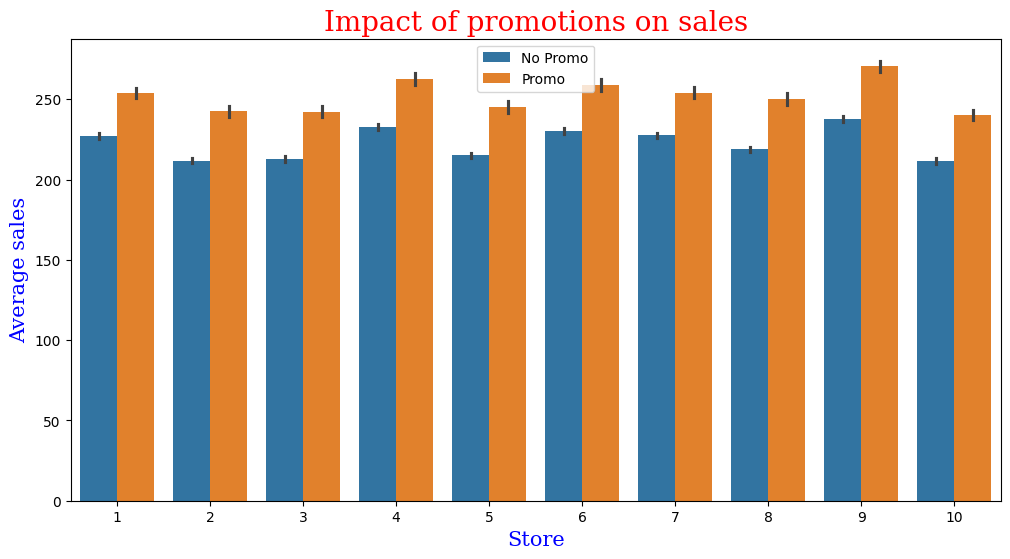

In [91]:
#plotting a bar chart to visualize the impact of promotions on sales
plt.figure(figsize=(12,6))
sns.barplot(data=sales_data, x='store', y='sales', hue='promo')
font1 = {'family':'serif','color':'r', 'size': 20}
font2 = {'family':'serif','color':'b', 'size': 15}
plt.title('Impact of promotions on sales', fontdict = font1)
plt.xlabel('Store', fontdict = font2)
plt.ylabel('Average sales', fontdict = font2)
plt.legend()
plt.show()

The above bar chart visualizes the impact promotions have on store sales.

The x axis represents the store and promo while the y axis represents the Average sales.

**For all stores, the average sales have increased significantly with promotions with store 9 taking the lead in sales.**

In [93]:
sales_data['holiday'] = sales_data['holiday'].map({0: 'No Holiday', 1: 'Holiday'})

In [94]:
#Impact of holidays on store sales
sales_data.groupby(['store', 'holiday'])['sales'].mean()

store  holiday   
1      Holiday       267.415161
       No Holiday    229.539850
2      Holiday       255.240769
       No Holiday    214.590526
3      Holiday       255.555556
       No Holiday    213.950308
4      Holiday       277.225286
       No Holiday    233.907515
5      Holiday       258.976753
       No Holiday    216.751317
6      Holiday       269.199306
       No Holiday    232.839711
7      Holiday       266.631463
       No Holiday    228.516173
8      Holiday       260.263690
       No Holiday    219.867693
9      Holiday       278.496914
       No Holiday    240.435193
10     Holiday       248.722907
       No Holiday    212.931180
Name: sales, dtype: float64

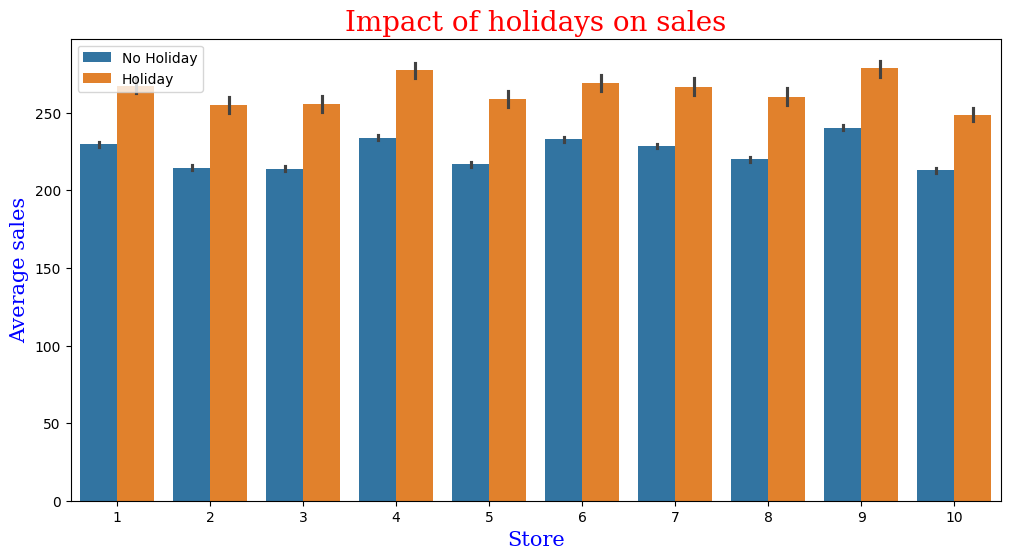

In [96]:
#plotting a bar chart to visualize the impact of holidays on average store sales
plt.figure(figsize=(12,6))
sns.barplot(data=sales_data, x='store', y='sales', hue='holiday')
font1 = {'family':'serif','color':'r', 'size': 20}
font2 = {'family':'serif','color':'b', 'size': 15}
plt.title('Impact of holidays on sales', fontdict = font1)
plt.xlabel('Store', fontdict = font2)
plt.ylabel('Average sales', fontdict = font2)
plt.legend()
plt.show()

The above bar chart visualizes the impact of holidays on average store sales.

The x axis represents the store and holiday values whilst the y axis represents the Average sales.

**The average sales for all stores increase with holidays.**